# Regression

In this notebook, we will be discussing on some of the common regresion analysis.

### What is regression analysis? Why do we do regression analysis?
Regression analysis investigates the relationship between a dependent and independent variable(s). It is usually used when you want to do forecasting, time series modelling and finding the cause-and-effect relationship between the variables.

For example, suppose you’re a farmer trying to predict next quarter’s crop yield. You would probably know that there are many variables that would affect crop yield, for example, rainfall, seed quality, and soil quality. You might start thinking about which variable have the biggest effect on crop yield. 

“Maybe the higher the soil quality, the higher the crop yield.” “Maybe an increase in cloud covers, increase crop yield.” 

Now, they all sound like valid variables! How can you prove it?

You can use regression analysis. It allows you to mathematically determine which of these variables might have an impact on crop yield, giving the farmer a more informed choice on the strategies they can take. For example, knowing that soil quality might have the highest impact on the crop will motivate the farmers to put more resources into making sure that they have good quality soil in their farm. Regression analysis helps to point out the variables that matter most, variables that you can ignore and how the variables interact with one another.

### Correlation vs Causation
When we do regression analysis, one of the biggest mistakes made by people is to spot for correlation and assume causation. Let me give an example. Look at the graph below, the two lines have a correlation of 99.79%, does this mean that when the red line increases, it causes the black line to increase as well? or vice versa?

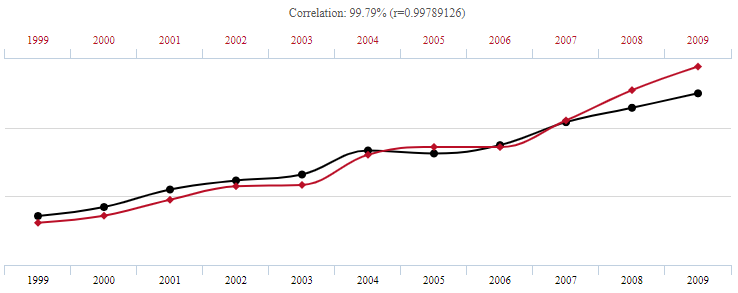

Now look at the graph below, with labels and titles. The graph shows that the number of people eating ice cream is well corellated with the number of shark attacks. How would you explain this correlation? Would you say that eating ice cream causes shark attacks, or would shark attacks result in more people eating ice cream?

![correlation](./resources/correlation.png)

Image source: Quora.com

Actually, there is no causation relationship there. Eating ice cream will not affect the number of shark attack!

Therefore, when we are processing data and carrying out regression analysis, we need to bear in mind that the correlation between the variables does not imply causation. 

This means that just because the two variables have a relationship doesn't mean that one variable will affect the other. There are many variables you should examine before determining the relationships between two events. You will be able to find other variables which are responsible for the correlation.

For those who are curious, those graphs are from https://www.tylervigen.com/spurious-correlations. You can head over to that link to see some of these interesting correlations.

Right now, let us learn about the most simple kind of regression analysis, the linear regression:

# Linear Regression

Linear regression is one of the most common regression techniques known. It represents the relationship between variables using a straight line. What are some relationship that can be represented with a straight line? Perhaps height vs age? No of hours spent studying vs result? There are many more!

### The regression line
A regression line as known as best fit line is used to determine the linear relationship. It is the line that best represent the relationship between the variables we are comparing. 

![bestfit](./resources/bestfit.png)

We can describe the straight line below with equation of y = mx + c (as shown below), where: 
- m is the gradient of the line and 
- c is the y-intercept (where the line cuts the y-axis/ vertical line) as seen below.

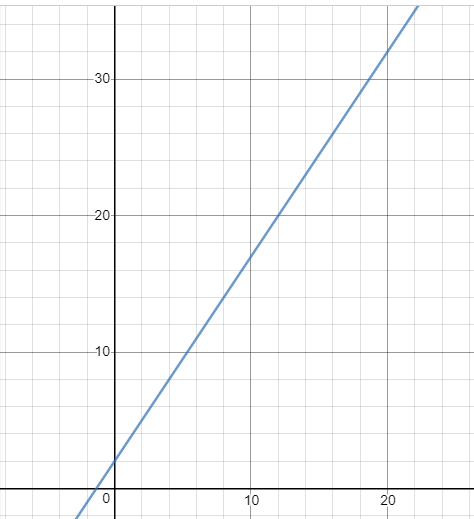

To help us with regression analysis, the sklearn library has a function called LinearRegression(). This function uses the data to plot/find the linear regression line also known as best fit line.

Linear regression uses the least squares method to obtain the best fit line, it means to obtain the m and c in the equation of y = mx + c. In this case, we are finding the mininum sum of the squares of the differences between actual and predicted values.

Head over to this video to learn more about how linear regression is calculated using the least square method, https://www.youtube.com/watch?v=JvS2triCgOY

# Step by step approach to solve a regression problem

Okay, so now we know that:
- We can find out the relationship between variables by plotting them to scatter plot
- We can represent the relationship between them using lines. 
- In linear regression, we use a straight line to represent this relationship
- The best fit line is considered as the best line to represent linear relationship between variables

Alright, so how can we conduct regression analysis? How might we look at a dataset and apply best fit line to it? Let's see how it works, step by step!

### Activity 1: Import Libraries

Firstly, let's do the basic imports of pandas, matplotlib, numpy and seaborn libraries.
- pandas and numpy will help us organise and manipulate our data
- matplotlib and seaborn help us with visualising our data in the form of graphs

In [10]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Activity 2: Read csv data

Next, let's try to read the csv data from the file weatherHistory and look at the data types of these features. Remember the data might be huge, use head() to print the first 10 values.

In [29]:
# read csv file
data = pd.read_csv("data/weatherHistory.csv")
# print first 10 values
display(data.head(10))

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


### Activity 3:
Now that you've loaded the csv data, answer the following questions.
1. What are the features available in the dataset? 
2. What kind of data types are there?

In [30]:
# print the feature data type
print(data.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


Look at the data types above. Which variables do you think will be correlated to each other? Why?

### Activity 4:
Now that we've known what kind of data is present, let's plot the graphs to see potential relationship between the different variables! For now, we will plot the 3 relationships below:

1. Pressure vs Time
2. Humidity vs Time
3. Temperature vs Time

Before plotting the graphs, we will first clean the data off any zero and NaN values.

In [31]:
# processing data removing zero & NaN values
data= data.replace(0,pd.np.nan)
data.dropna()

/opt/anaconda3/envs/ITE/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


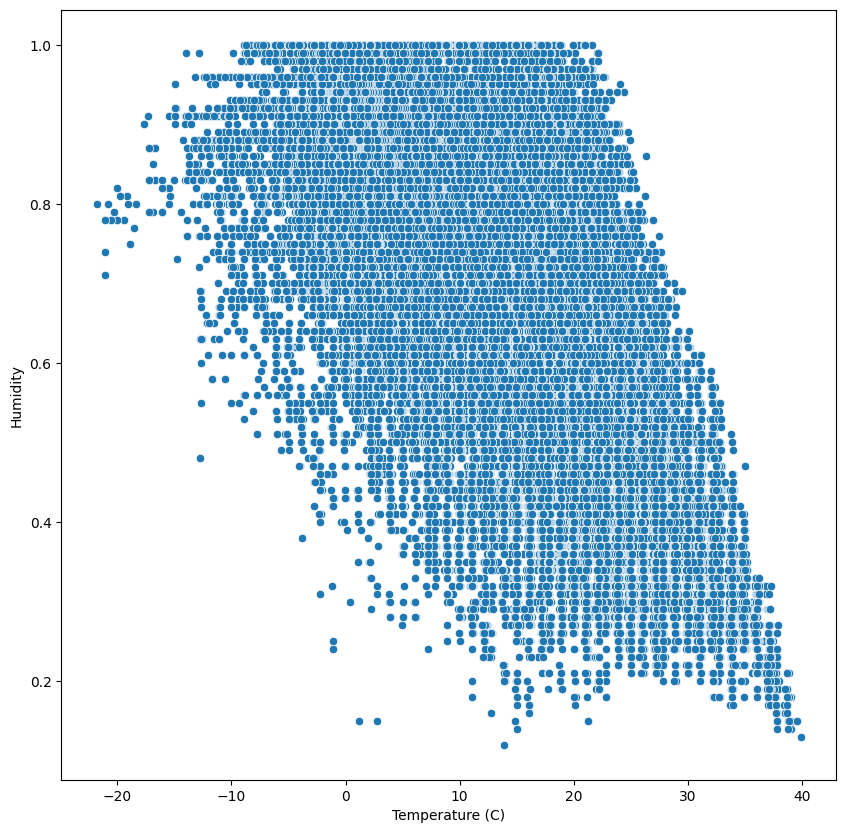

In [32]:
pressure = data['Pressure (millibars)']
humidity = data['Humidity']
temperature = data['Temperature (C)']
#wind_speed = data['Wind Speed (km/h)']
#visibility = data['Visibility (km)']


plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=temperature, y=humidity)
plt.show()

That's a lot of points! 

Do you think you can draw a line to show the relationship between the two variables?

Now it's your turn! Draw the scatter plot for:
- Pressure vs Humidity
- Pressure vs Temperature

### Pressure vs Humidity

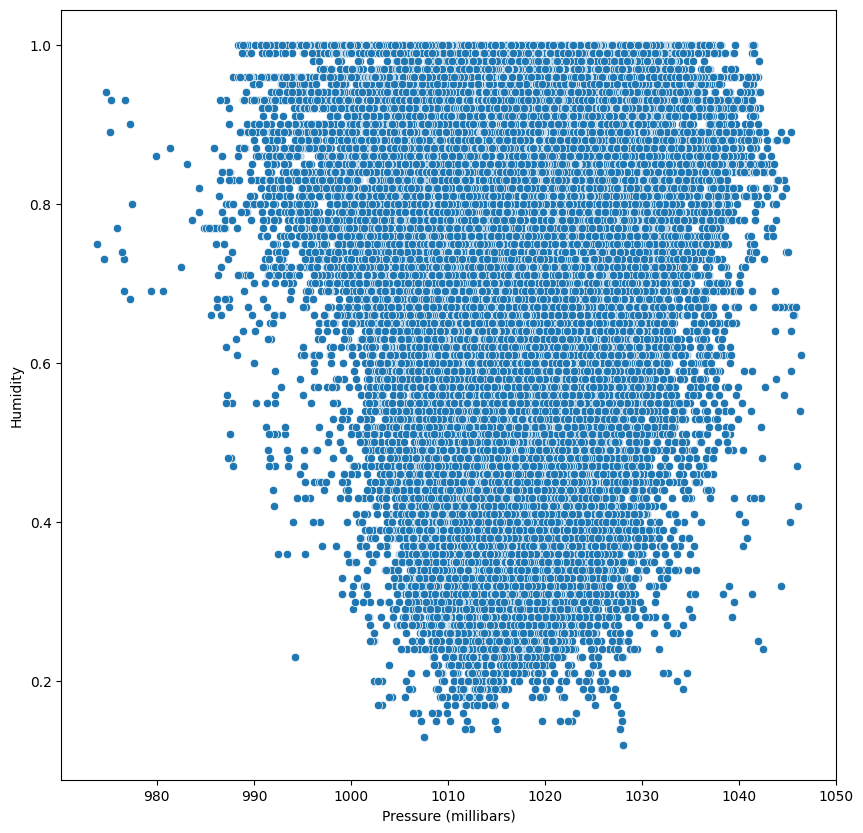

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=pressure, y=humidity)
plt.show()

### Pressure vs Temperature

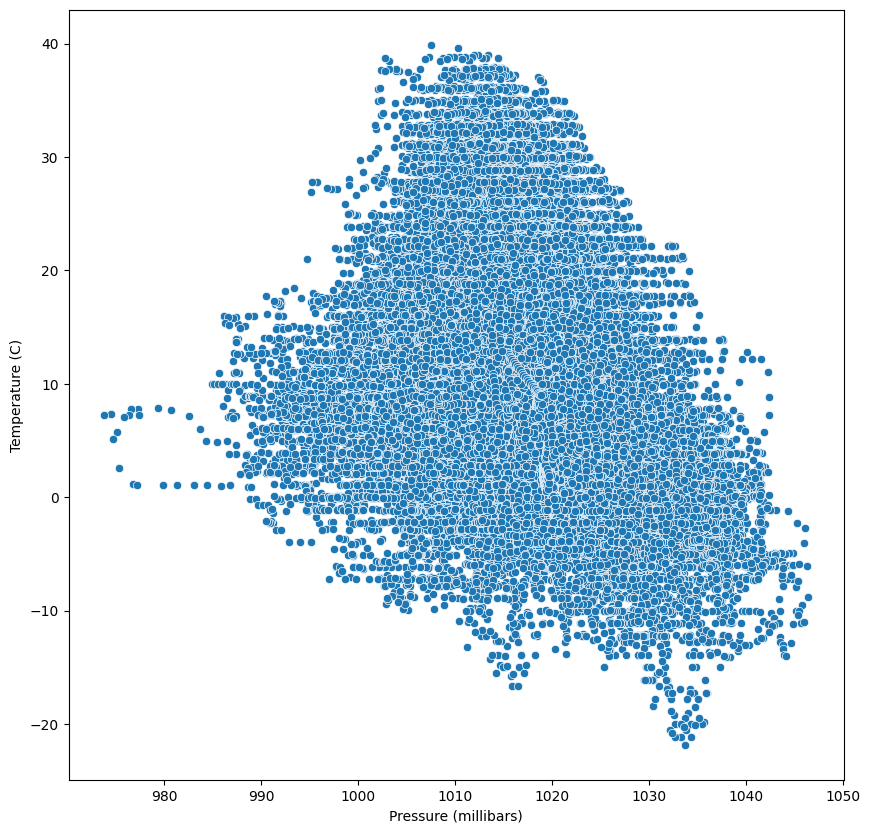

In [34]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=pressure, y=temperature)
plt.show()

### Activity 5:
What do the graphs tell you about the variables?

In [35]:
# Type your answer here
# Not much relationship can be said about the variable

Now, we are going to use a tool to visualise correlation between variables. 

The correlation map compares different variables and show correlation factors between them. Let's plot one now! 

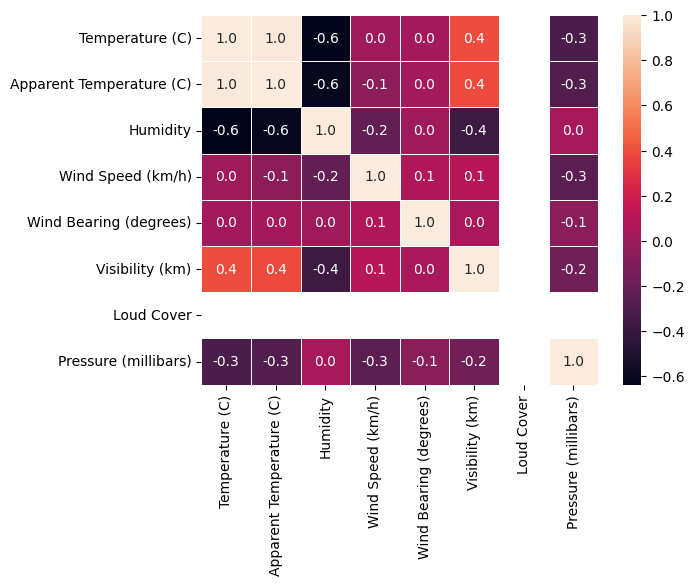

In [36]:
import seaborn as sns
snsplot = sns.heatmap(data.corr(), annot=True,linewidths=0.5, fmt='.1f')
#snsplot.figure.savefig("corr_data.png")

plt.show()

data.corr() computes pairwise correlation of columns giving you the correlation factors. The closer it is to 1 or -1 the more the two variables are correlated.

### Activity 6
Which variables are more correlated to each other?

In [37]:
# Type your answer here
# temperature vs humidity = more correlated 
#visibility vs humidity

In [48]:
import datetime
# Complete the call to convert the date column
data['Formatted Date'] =  pd.to_datetime(data['Formatted Date'],
                              format='%Y-%m-%d %H:%M:%S.%f', utc=True)

# Confirm the date column is in datetime format
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96128 non-null  float64            
 4   Apparent Temperature (C)  96384 non-null  float64            
 5   Humidity                  96431 non-null  float64            
 6   Wind Speed (km/h)         95156 non-null  float64            
 7   Wind Bearing (degrees)    94189 non-null  float64            
 8   Visibility (km)           96003 non-null  float64            
 9   Loud Cover                0 non-null      float64            
 10  Pressure (millibars)      95165 non-null  float64            
 11  Daily Summary  

In [49]:
display(data.head(5))

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,NaN,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,NaN,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,NaN,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,NaN,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,NaN,1016.51,Partly cloudy throughout the day.


In [50]:
print(data['Formatted Date'][10].month)

4


In [51]:
print(data['Formatted Date'][0].day)
print(data['Formatted Date'][0].month)
print(data['Formatted Date'][0].year)

31
3
2006


In [52]:
data['month'] = data['Formatted Date'].dt.month

In [53]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,NaN,1015.13,Partly cloudy throughout the day.,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,NaN,1015.63,Partly cloudy throughout the day.,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,NaN,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,NaN,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,NaN,1016.51,Partly cloudy throughout the day.,4


In [54]:
data_jan = data[data.month == 1]
data_feb = data[data.month == 2]
data_mar = data[data.month == 3]
data_apr = data[data.month == 4]
data_may = data[data.month == 5]
data_jun = data[data.month == 6]
data_jul = data[data.month == 7]
data_aug = data[data.month == 8]
data_sep = data[data.month == 9]
data_oct = data[data.month == 10]
data_nov = data[data.month == 11]
data_dec = data[data.month == 12]


## Use January data for data analysis

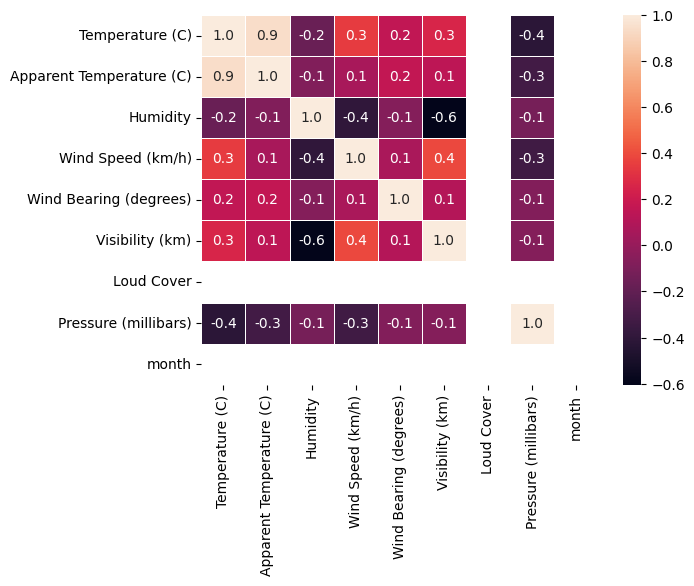

In [55]:
snsplot = sns.heatmap(data_jan.corr(), annot=True,linewidths=0.5, fmt='.1f')
#snsplot.figure.savefig("corr_data.png")

plt.show()

## February

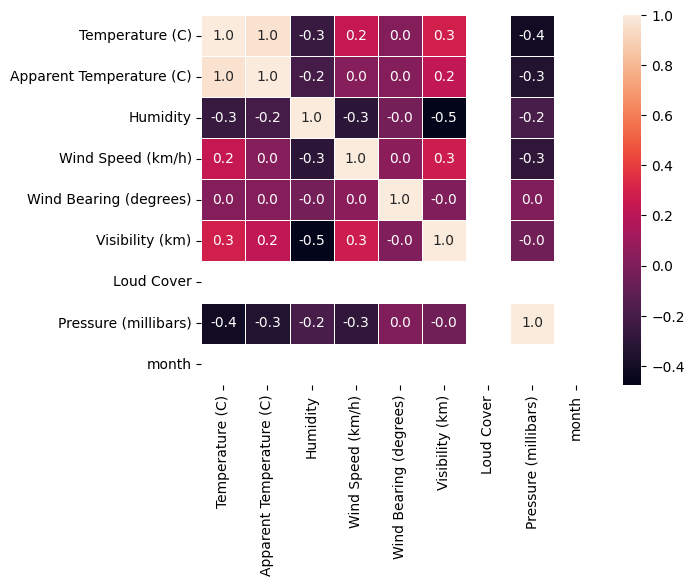

In [56]:
snsplot = sns.heatmap(data_feb.corr(), annot=True,linewidths=0.5, fmt='.1f')
#snsplot.figure.savefig("corr_data.png")

plt.show()

## March

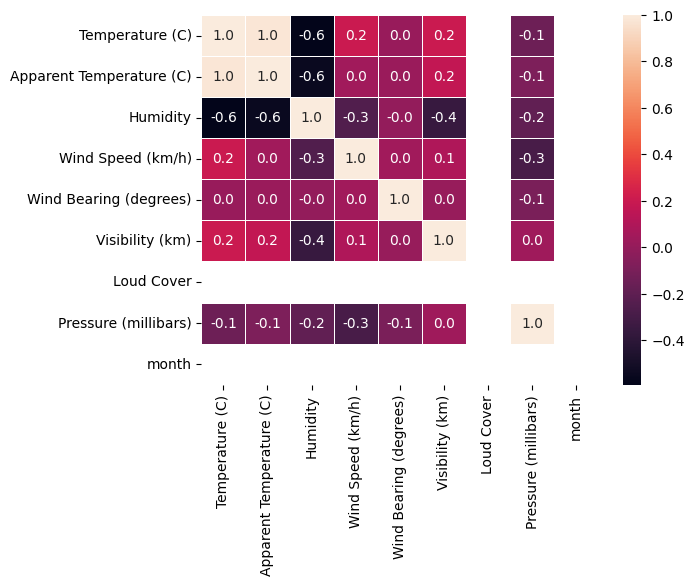

In [57]:
snsplot = sns.heatmap(data_mar.corr(), annot=True,linewidths=0.5, fmt='.1f')
#snsplot.figure.savefig("corr_data.png")

plt.show()

### Experiment with it yourself! Go through the months and see if there's different relationship throughout the year!

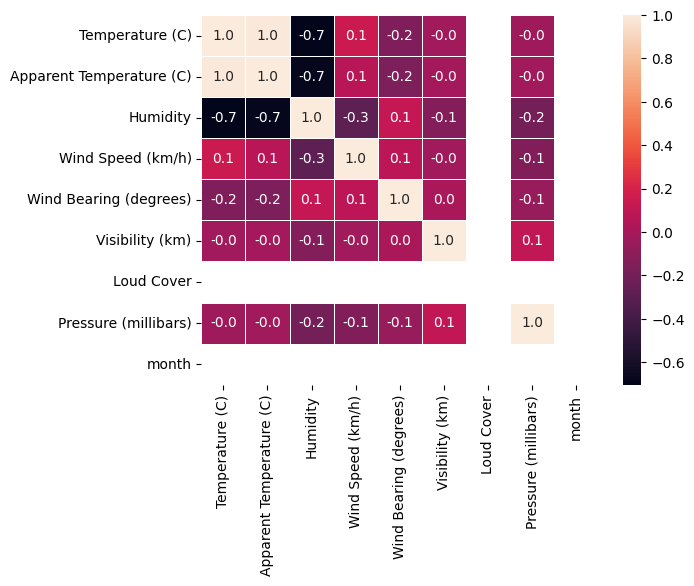

In [58]:
snsplot = sns.heatmap(data_apr.corr(), annot=True,linewidths=0.5, fmt='.1f')
#snsplot.figure.savefig("corr_data.png")

plt.show()

### Draw scatter plot of the relationship

In [59]:
pressure_sep = data_sep['Pressure (millibars)']
humidity_sep = data_sep['Humidity']
temperature_sep = data_sep['Temperature (C)']  

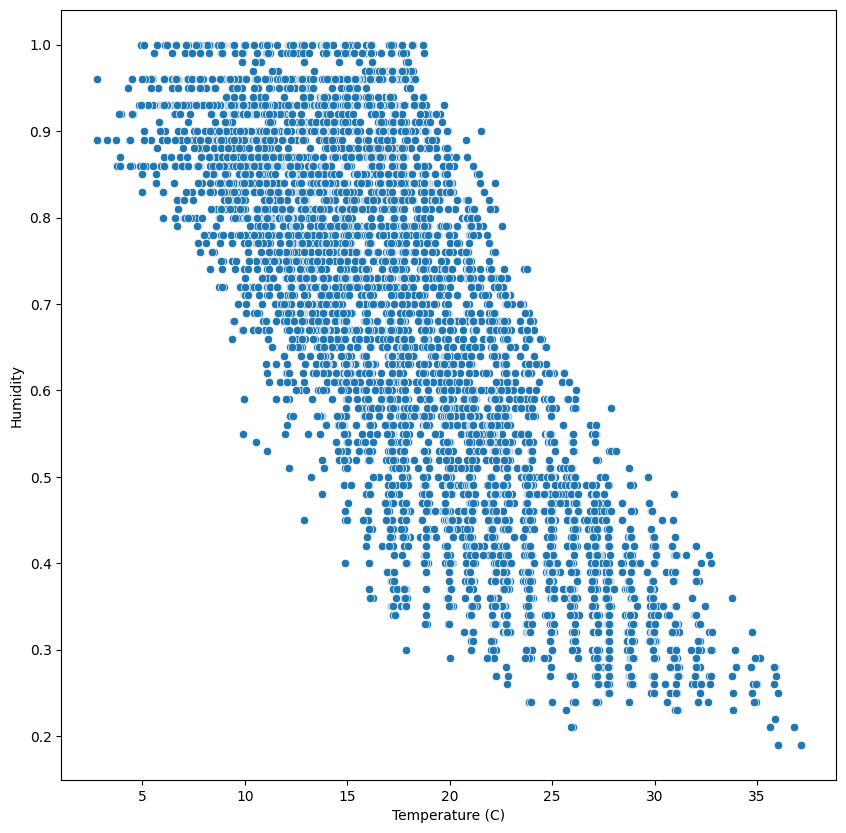

In [60]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=temperature_sep, y=humidity_sep)
plt.show()

See, the relationship here clearly shows a more linear trend compared to previously. Perhaps we can create a model that can predict humidity based on temperature better in some months. Let's learn how to do this using the Sklearn library

### Regression analysis using scikit learn library

With machine learning, we will determine the best fit line that can describe the relationship between features we select and the target variable. 

Before we get into predicting the data, there is a few things we have to import from the sklearn library.

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [450]:
display(data)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,NaN,1015.13,Partly cloudy throughout the day.,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,NaN,1015.63,Partly cloudy throughout the day.,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,NaN,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,NaN,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,NaN,1016.51,Partly cloudy throughout the day.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,NaN,1014.36,Partly cloudy starting in the morning.,9
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,NaN,1015.16,Partly cloudy starting in the morning.,9
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,NaN,1015.66,Partly cloudy starting in the morning.,9
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,NaN,1015.95,Partly cloudy starting in the morning.,9


In [451]:
print(data['Humidity'].dtypes)
print(data['Temperature (C)'].dtypes)

float64
float64


In [452]:
import numpy as np

Next, we will set the features and target for our regression model. 

In [453]:
alldata = data.copy()
alldata.dropna(inplace=False)
X = alldata['Temperature (C)'].round(decimals=2)
y = alldata['Humidity'].round(decimals=2)

X = X.fillna(X.mean(), inplace=False)
y = y.fillna(y.mean(), inplace=False)

In [454]:
np.unique(X)

array([-21.82, -21.11, -20.78, ...,  38.98,  39.59,  39.91])

In [455]:
np.unique(y)

array([0.12      , 0.13      , 0.14      , 0.15      , 0.16      ,
       0.17      , 0.18      , 0.19      , 0.2       , 0.21      ,
       0.22      , 0.23      , 0.24      , 0.25      , 0.26      ,
       0.27      , 0.28      , 0.29      , 0.3       , 0.31      ,
       0.32      , 0.33      , 0.34      , 0.35      , 0.36      ,
       0.37      , 0.38      , 0.39      , 0.4       , 0.41      ,
       0.42      , 0.43      , 0.44      , 0.45      , 0.46      ,
       0.47      , 0.48      , 0.49      , 0.5       , 0.51      ,
       0.52      , 0.53      , 0.54      , 0.55      , 0.56      ,
       0.57      , 0.58      , 0.59      , 0.6       , 0.61      ,
       0.62      , 0.63      , 0.64      , 0.65      , 0.66      ,
       0.67      , 0.68      , 0.69      , 0.7       , 0.71      ,
       0.72      , 0.73      , 0.73506663, 0.74      , 0.75      ,
       0.76      , 0.77      , 0.78      , 0.79      , 0.8       ,
       0.81      , 0.82      , 0.83      , 0.84      , 0.85   

In [456]:
print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Activity 8:
From the code above, which is the dependent and independent variables.

In [457]:
# Type your answer
#Dependent: Humidity
#Independent: Temperature

### Dividing data into Training and test set

Now, we are going to split test and training sets. Why do we split the data into training and test sets?

Remember, in the supervised learning problem, we feed our training set (comprises of our selected features and the target) to our learning function. It will then create a model based on the training set.  

The test set is subsequently used to test the model's prediction to see how the model performs.

For more information, head over to https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6. 

Do read the section on 'What is Overfitting/Underfitting a Model?' to get more information on why we split test and training sets and its effects if we overfit or underfit a model.

Let's implement the code by calling the train_test_split function. We are going to split the train set to be 70% of the data and the test set to be 30% of the data.

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Alright, now we've obtained our training and testing set. Print out the shape of these variables and check if they make sense i.e. if the testing set is 0.3 of the total data and the training set is 0.7 of the total data.

In [459]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (67517, 1)
X_test shape: (28936, 1)
y_train shape: (67517, 1)
y_test shape: (28936, 1)


### Create a linear regression object
We have earlier imported the Linear Regression class from scikit learn. We can now use this class to create a linear regression object using the code below. 

In [460]:
linreg = LinearRegression()

Remember that in Python, an object contain certain characteristic(variables) and methods (functions). 

We will use now one of the methods called 'fit' to find the best line to describe the dataset. This is the training of the model using the training dataset

Now, we've finally come to the part where we use the linear regression function. 
Here are the steps, we will fit the data using the training set and predict using the test set.
We then test the effectiveness of the model using mean_absolute_error to see how far off the test and predicted values are.

In [461]:
linreg.fit(X_train,y_train) #train linear regression model

LinearRegression()

After training, we can print out the intercept and gradient of the line. 

In [462]:
#To retrieve the intercept:
print(linreg.intercept_)
#For retrieving the slope:
print(linreg.coef_)

[0.89079842]
[[-0.01300136]]


Now that we have trained our model, we can make some predictions

In [463]:
y_pred = linreg.predict(X_test)

Now, we can create a dataframe comparing the actual and predicted value of humidity

In [464]:
df = pd.DataFrame()

In [465]:
y_test.shape

(28936, 1)

In [466]:
y_pred.shape

(28936, 1)

In [467]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()

In [468]:
print(f'{y_test.shape} | {y_pred.shape}')

(28936,) | (28936,)


In [469]:
df['Actual'] = y_test
df['Predicted'] = y_pred

In [470]:
df

,Actual,Predicted
0,0.69,0.582276
1,0.52,0.711510
2,0.70,0.789908
3,0.71,0.679526
4,0.79,0.773136
...,...,...
28931,0.47,0.840873
28932,0.69,0.659634
28933,0.87,0.753114
28934,0.73,0.639482


Then, we will draw a graph to show our dataset with the best fit line

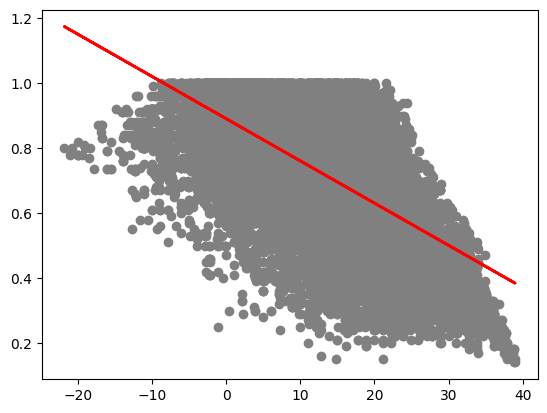

In [471]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

We can see that the line follows our data general trend. However, as seen in the scatter plot, there are great variation within the data itself, which mean that the line will not be able to accurately predict our data. 

Let's now learn about several metrics that we can use to measure the line's ability to match and predict our data. 

### Evaluating our model
There are various means to evaluate our best fit line. See this [link](https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d) to find out three popular evaluation tools for linear regression problem. 

In [472]:
print ("Linear Regression Score")
predict = linreg.predict(X_test)
print ("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print ("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print ("R2: ", r2_score(y_test,y_pred))

Linear Regression Score
Mean Absolute Error:  0.12199748317578774
Mean Squared Error:  0.022734657558224576
R2:  0.405929933152545


See that the model performs rather poorly, because the initial dataset does not show any particular good trend/ relationship as well. 

Now, let's try using the month data, which we earlier found to display closer relationship between 2 variables: humidity and temperature

## Now, use the September data
Time to try! Now, use the September data and train a linear regression model

### Select your features

In [473]:
data_sep.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month
7295,2006-09-30 22:00:00+00:00,Clear,rain,14.261111,14.261111,0.93,3.0751,130.0,6.0697,NaN,1017.53,Foggy in the morning.,9
7296,2006-09-30 23:00:00+00:00,Clear,rain,13.705556,13.705556,0.93,3.0429,158.0,6.0697,NaN,1017.43,Foggy in the morning.,9
8066,2006-09-01 00:00:00+00:00,Clear,rain,10.644444,10.644444,0.95,3.1717,250.0,6.2951,NaN,1019.97,Partly cloudy starting in the morning continui...,9


In [508]:
data_sep.dropna(inplace=False)

X1 = data_sep['Temperature (C)'].copy().round(decimals=2)
y1 = data_sep['Humidity'].copy().round(decimals=2)

X1 = X1.fillna(X1.mean(), inplace=False)
y1 = y1.fillna(y1.mean(), inplace=False)

### Split data

In [511]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3)

X_train1 = X_train1.values.reshape(-1, 1)
X_test1 = X_test1.values.reshape(-1, 1)
y_train1 = y_train1.values.reshape(-1, 1)
y_test1 = y_test1.values.reshape(-1, 1)

In [512]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(5544, 1)
(2376, 1)
(5544, 1)
(2376, 1)


### Create a linear regression instance

In [513]:
#yourcodehere
linreg2 = LinearRegression()

### Train your model

In [514]:
#yourcodehere
linreg2.fit(X_train1, y_train1)

LinearRegression()

### Print intercept and slope

In [515]:
#yourcodehere
#To retrieve the intercept:
print(linreg2.intercept_)
#For retrieving the slope:
print(linreg2.coef_)

[1.17131055]
[[-0.02757166]]


### Make predictions using test data

In [516]:
#yourcodehere
y_pred1 = linreg2.predict(X_test1)

In [517]:
y_pred1 = y_pred1.flatten()
y_test1 = y_test1.flatten()

### Compare actual and predicted value using dataframe

In [518]:
df1 = pd.DataFrame()

df1['Actual'] = y_test1
df1['Predicted'] = y_pred1

df1

,Actual,Predicted
0,0.73,0.822805
1,0.80,0.864162
2,0.88,0.899178
3,0.83,0.894767
4,0.75,0.824183
...,...,...
2371,0.45,0.334235
2372,0.90,0.938881
2373,0.72,0.694597
2374,0.87,0.686049


### Plot graph

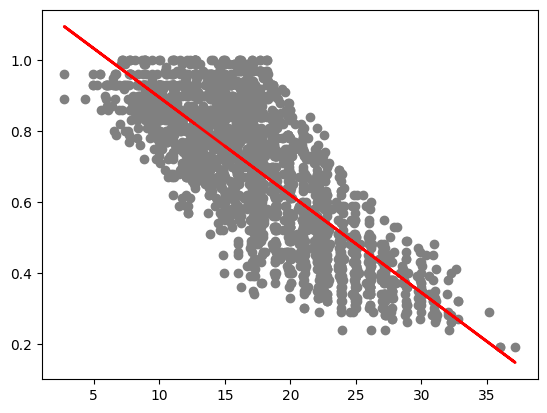

In [519]:
#yourcodehere
plt.scatter(X_test1, y_test1,  color='gray')
plt.plot(X_test1, y_pred1, color='red', linewidth=2)
plt.show()

Seems that the line will be better able to predict humidity value based on temperature as the current best fit line is closer to the dataset. 

### Print our evaluation matrices

In [520]:
#yourcodehere
print ("Linear Regression Score")
predict1 = linreg2.predict(X_test1)
print ("Mean Absolute Error: ", mean_absolute_error(y_test1,y_pred1))
print ("Mean Squared Error: ", mean_squared_error(y_test1,y_pred1))
print ("R2: ", r2_score(y_test1,y_pred1))

Linear Regression Score
Mean Absolute Error:  0.10167858294388234
Mean Squared Error:  0.015707066379914
R2:  0.61615224891275


See, it is much better now! 

### Conclusion

We have learned that machine learning can be used for both classification and regression model. 
We touched on linear regression model in the notebook, but there are numerous other regression models that you can use that might better represent your data. When you have complex relationship, you might also use neural network to attempt to create a model that can better explain your dataset. 

## Challenge Time
Read this article and try to implement this using polynomial regression instead of linear regression. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155